## Exerise for Discrete Variables
### Perform Basic operations and view different categorical values


In [2]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



## Basics

In [3]:
#reading data
data = pd.read_csv('Data/churn_prediction.csv')

In [4]:
#first look
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [5]:
data.shape

(28382, 21)

In [6]:
#data.info()

In [7]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [8]:
# Convert below columns to category data types

data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['vintage'] = data['vintage'].astype('category')

In [9]:
data.dtypes

customer_id                          int64
vintage                           category
age                                  int64
gender                            category
dependents                         float64
occupation                        category
city                               float64
customer_nw_category                 int64
branch_code                          int64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                                int64
last_transaction                    object
dtype: object

In [10]:
# Create separate datasets for Numeric and Category data types
##---------------------------------------
numeric_data = data.select_dtypes(include = ['int64','float64'])
cat_data = data.select_dtypes(exclude = ['int64','float64'])
#
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
# data['woy_ls_tran'] = date.weekofyear 
# weekofyear is deprecated
data['woy_ls_tran'] = date.strftime('%V').astype('float')
# Refer https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

In [11]:
# checking new extracted columns using datetime
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


In [12]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction', 'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran',
       'dow_ls_tran'],
      dtype='object')

In [13]:
cat_data.head()

,vintage,gender,occupation,last_transaction
0,2101,Male,self_employed,2019-05-21
1,2348,Male,self_employed,2019-11-01
2,2194,Male,salaried,NaT
3,2329,NaN,self_employed,2019-08-06
4,1579,Male,self_employed,2019-11-03


In [14]:
numeric_data.head()

,customer_id,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,35,0.0,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,31,0.0,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,90,NaN,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,42,2.0,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [15]:
n_describe = numeric_data.describe()

In [16]:
n_describe

,customer_id,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [17]:
cat_data.dtypes

vintage             category
gender              category
occupation          category
last_transaction      object
dtype: object

In [18]:
# Analyze category values for 'Gender', 'Vintage' and 'Occupation' columns 

print('Unique Gender: ', cat_data['gender'].nunique(dropna=False))
print('Mode of Gender: ', cat_data['gender'].mode()[0])
print(cat_data['gender'].value_counts(dropna=False))

print('\nUnique Vintage: ', cat_data['vintage'].nunique(dropna=False))
print('Mode of Vintage: ', cat_data['vintage'].mode()[0])
print(cat_data['vintage'].value_counts(dropna=False))

print('\nUnique Occupation: ', cat_data['occupation'].nunique(dropna=False))
print('Mode of Occupation: ', cat_data['occupation'].mode()[0])
print(cat_data['occupation'].value_counts(dropna=False))

Unique Gender:  3
Mode of Gender:  Male
gender
Male      16548
Female    11309
NaN         525
Name: count, dtype: int64

Unique Vintage:  1459
Mode of Vintage:  2251
vintage
2260    69
2251    69
2338    68
2223    67
2206    66
        ..
1148     1
1144     1
1143     1
1142     1
73       1
Name: count, Length: 1459, dtype: int64

Unique Occupation:  6
Mode of Occupation:  self_employed
occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
NaN                 80
company             40
Name: count, dtype: int64


* For occupation category, Most number of customers will follow __'Self employed'__ occupation
* For occupation category, Mode is self employed which is represented by 0 in our dataset

### Check out individually

In [19]:
#distribution of gender
data['gender'].value_counts()

gender
Male      16548
Female    11309
Name: count, dtype: int64

Number of Male Customers is greater than Number of Female Customers in our data

In [20]:
data['gender'].value_counts()/sum(data['gender'].value_counts().values)

gender
Male      0.594034
Female    0.405966
Name: count, dtype: float64

In [21]:
data['gender'].value_counts(normalize=True)

gender
Male      0.594034
Female    0.405966
Name: proportion, dtype: float64

Approximately 60% Customers are Male Customers and 40% Customers are female Customers

In [22]:
data['occupation'].nunique()

5

There are total 5 unique categories for occupation feature in our data

In [23]:
data['occupation'].mode()

0    self_employed
Name: occupation, dtype: category
Categories (5, object): ['company', 'retired', 'salaried', 'self_employed', 'student']

In [24]:
data['occupation'].value_counts()

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: count, dtype: int64

* Most customer follow Self Employed Profession in our dataset
* Very Few Customers follow Company Profession in our dataset

# Bernoulli 

### Draw Bar Plot to show Distribution of  Gender values for churned customers

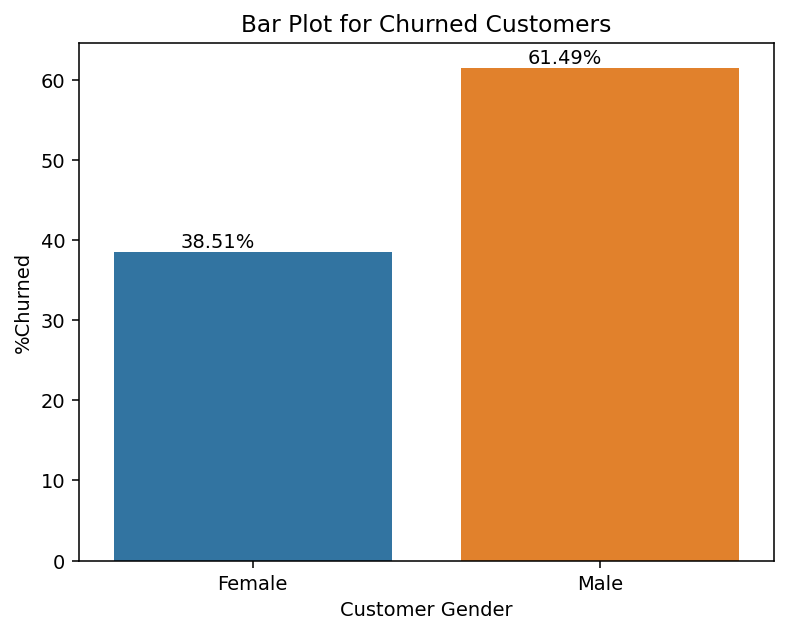

In [25]:
plt.figure(dpi = 140)
#
x_axis = data[data['churn'] == 1]['gender'].value_counts(normalize = True, ascending = False).index
y_axis = (data[data['churn'] == 1]['gender'].value_counts(normalize = True, ascending = False).values)*100.

#
ax = sns.barplot(x = x_axis, y = y_axis, orient = "v")
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
#
plt.xlabel('Customer Gender')
plt.ylabel('%Churned')
plt.title('Bar Plot for Churned Customers')
#
plt.show()

### Categorical

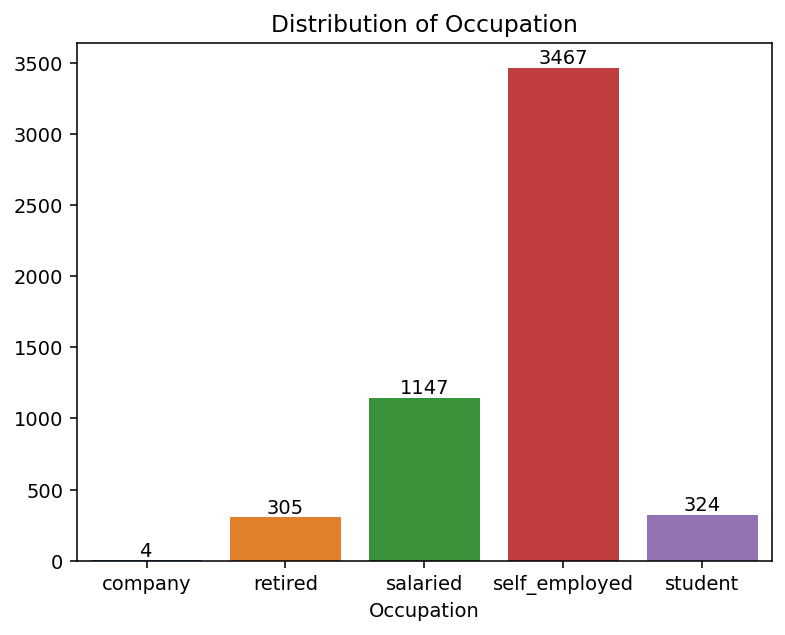

In [31]:
plt.figure(dpi = 140)
#
x_data = data[data['churn']==1]['occupation'].value_counts().index
y_data = data[data['churn']==1]['occupation'].value_counts().values

ax = sns.barplot(x = x_data, y = y_data, orient = 'v')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.show()

* 3467 Customers are churning from self employed category
* 1147 customers are churning from salaried category
* 324 and 305 customers are churning from student and retired category
* Only 4 customers are churning from company profession

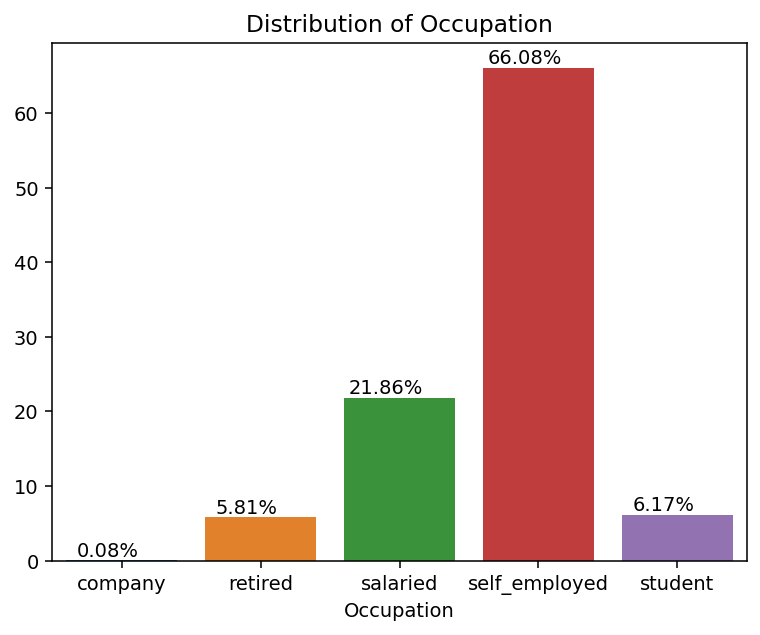

In [151]:
plt.figure(dpi = 140)
#
x_data = data[data['churn']==1]['occupation'].value_counts().index
y_data = data[data['churn']==1]['occupation'].value_counts(normalize = True).values * 100

ax = sns.barplot(x = x_data, y = y_data, orient = 'v')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')

for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.show()

* Almost 66 % of the customers who are churning belong to self employed profession
* Followed by 21% of customers who are churning belong to salaried profession